# The dynamics of Airbnb and San Francisco's rental market since 2015

Throughout our project, we will tell a story through our visualizations, about San Francisco's super expensive rental market, and Airbnb - an online, short-term rental marketplace.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
mpl.rcParams['figure.dpi'] = 100

In [2]:
df_2015 = pd.read_csv("Dataset/Airbnb/listings_201505.csv")

df_2016 = pd.read_csv("Dataset/Airbnb/listings_201605.csv")

df_2017 = pd.read_csv("Dataset/Airbnb/listings_201705.csv")

df_2018 = pd.read_csv("Dataset/Airbnb/listings_201805.csv")

df_2019 = pd.read_csv("Dataset/Airbnb/listings_201905.csv")

df_2020 = pd.read_csv("Dataset/Airbnb/listings_202005.csv")

In [3]:
df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019
df_2020["year"] = 2020

df2 = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])

df3 = df2.groupby("year")["year"].size().reset_index(name="listings")

## Let's start with the evolution of Airbnb listings over the years for San Francisco.

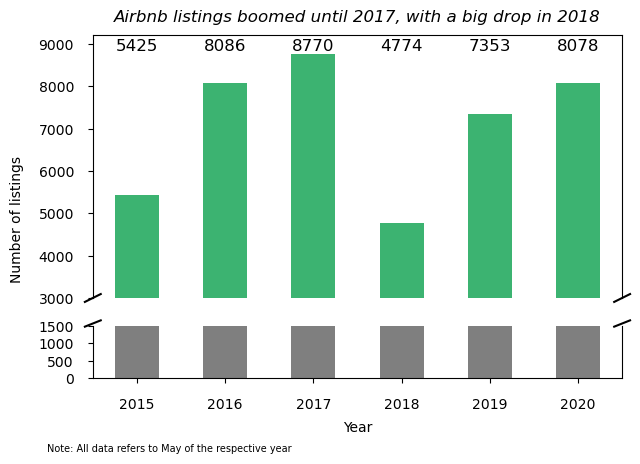

In [4]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True ,gridspec_kw={'height_ratios': [10, 2]})
f.tight_layout(pad=1)

df3.set_index("year").listings.plot.bar(ax=ax2, rot= 0, color = "tab:gray")
df3.set_index("year").listings.plot.bar(ax=ax, rot = 0, color = "mediumseagreen")
ax2.set_ylim(0, 1500)
ax.set_ylim(3000, 9200)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', pad=10, bottom= False)
ax2.tick_params(axis='both', which='major', pad=10)

loc = plticker.MultipleLocator(base=500)
ax2.yaxis.set_major_locator(loc)

ax.set_ylabel("Number of listings", size = "medium")
ax.yaxis.set_label_coords(-0.13,0.30)
ax2.set_xlabel("Year", size = "medium")
ax2.xaxis.set_label_coords(0.5, -0.8)

plt.figtext(0,-0.09, "Note: All data refers to May of the respective year", fontsize=7, horizontalalignment="left")
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + 7*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + 7*d), **kwargs)  # bottom-right diagonal
ax.set_title("Airbnb listings boomed until 2017, with a big drop in 2018", pad = 10, size = "large", fontstyle = "italic", color = "black")

for i in range(len(df3["listings"])):
    ax2.text(i, 9480,df3["listings"][i], fontsize = 12, verticalalignment = "center", horizontalalignment = "center")

We see an upwards trend overall! But...
#### __What happened in 2018?!__

When we first took on this challenge, we expected a surge in Airbnb listings over the years, reaching at least a constant level, but never decreasing.<br>
Turns out in 2018 there was a big decrease in the number of listings. 

According to the newspaper [San Francisco Chronicle](https://www.sfchronicle.com/business/article/Airbnb-listings-in-San-Francisco-plunge-by-half-12502075.php), in 2018 legislation with restrictive rules for Airbnb came into place. The owners of Airbnb rental sites had to undergo a registration with the city, and because of the bureaucracy involved, many failed to comply with regulations in time and thus, saw their listings dropped from Airbnb. 

There has been a recovery after hosts adapted to this legal hurdle, seen in 2019 and 2020.

## 2. Now, let us take a look at the neighbhourhoods with most listings and the price categories.

In [5]:
df2["Price Range"] = np.nan

In [6]:
df2["price"].describe()

count    42486.000000
mean       232.093443
std        438.669517
min          0.000000
25%        100.000000
50%        155.000000
75%        250.000000
max      30000.000000
Name: price, dtype: float64

In [7]:
for i in range(len(df2)):
    if df2["price"].iloc[i] <= 100:
        df2["Price Range"].iloc[i] = "cheap"
    elif df2["price"].iloc[i] >=250:
        df2["Price Range"].iloc[i] = "medium"
    else:
        df2["Price Range"].iloc[i] = "expensive"

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df3= df2.groupby(["neighbourhood", "Price Range"])[["neighbourhood","Price Range"]].size().reset_index(name="counts")
df3.set_index("neighbourhood", inplace=True)
df4 = df3.pivot(columns="Price Range", values="counts")
df4 = df4.reindex(["cheap","medium","expensive"],axis = 1)
df4["total_listings"] = df4.sum(axis=1)
df4.sort_values("total_listings", ascending= False, inplace= True)
total_listings = df4["total_listings"]
df4 = df4.drop("total_listings", axis=1)

first_10 = df4.head(10)
first_10 = first_10.iloc[::-1]

second_10 = df4.iloc[10:20]
second_10 = second_10.iloc[::-1]

third_10 = df4.iloc[20:30]
third_10 = third_10.iloc[::-1]

last_7 = df4.iloc[30:37]
last_7 = last_7.iloc[::-1]

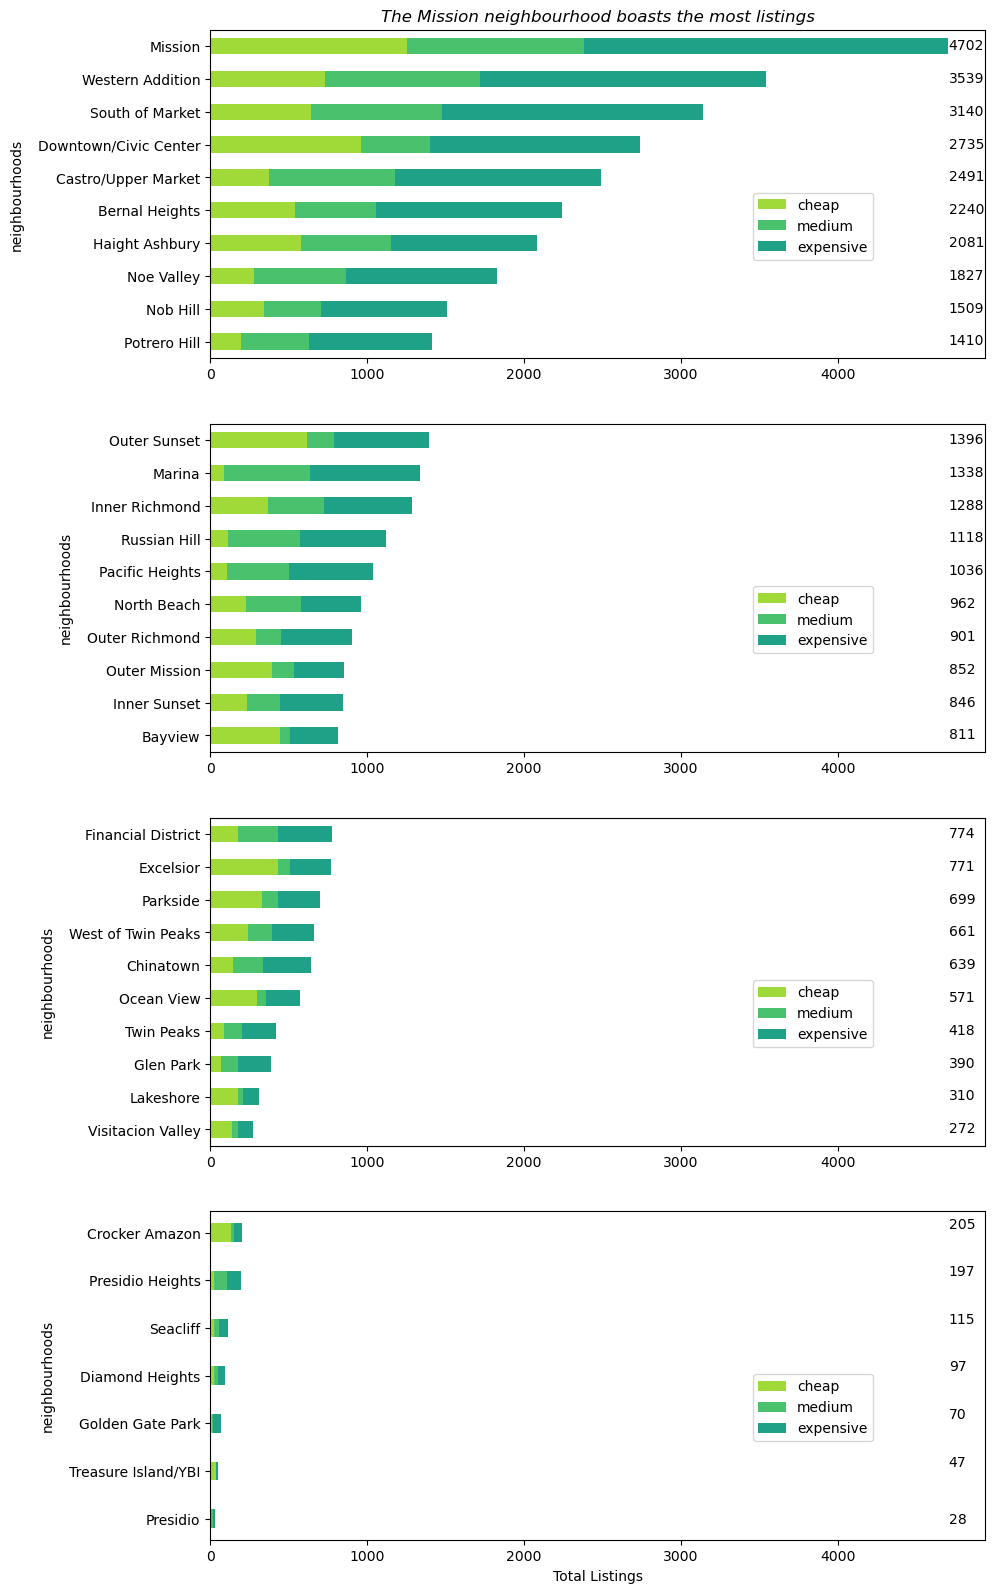

In [9]:
pal= sns.color_palette("viridis_r")

fig, sp = plt.subplots(4,1, sharex=True)

fig.set_figwidth(10)
fig.set_figheight(20)
first_10.plot(kind="barh", stacked=True, ax=sp[0], color = pal)

second_10.plot(kind="barh", stacked = True, ax = sp[1], color = pal)

third_10.plot(kind="barh", stacked = True, ax = sp[2], color = pal)

last_7.plot(kind= "barh", stacked = True, ax= sp[3], color = pal, width = 0.39)
    
sp[3].set_xlabel("Total Listings")

sp[0].set_title("The Mission neighbourhood boasts the most listings", fontstyle = "italic")

for i in range(4):
    sp[i].set_ylabel("neighbourhoods", labelpad = 10)

for i in range(3):
    sp[i].xaxis.set_tick_params(labelbottom=True)

for i in range(4):
    sp[i].legend(loc = (0.7,0.3))

for i in range(11):
    sp[0].annotate(total_listings[i], xy=(4705, 8.9-i))

for i in range(11):
    sp[1].annotate(total_listings[10+i], xy=(4705, 8.9-i))
    
for i in range(11):
    sp[2].annotate(total_listings[20+i], xy=(4705, 8.9-i))    
    
sp[3].annotate(total_listings[36], xy=(4705, -0.1))   
sp[3].annotate(total_listings[35], xy=(4705, 1.1))   
sp[3].annotate(total_listings[34], xy=(4705, 2.1))   
sp[3].annotate(total_listings[33], xy=(4705, 3.1))   
sp[3].annotate(total_listings[32], xy=(4705, 4.1))   
sp[3].annotate(total_listings[31], xy=(4705, 5.1))   
sp[3].annotate(total_listings[30], xy=(4705, 6.1));  

 <h4>Mission is the neighbourhood with most listings by a large difference. It also has the most cheap listings of any neighbhourhood.*</h4>

There are 37 neighbourhoods in San Francisco, and that explains why we had to break this graph 4 in four. Otherwise, it would be very hard to see anything!




*_In absolute numbers._ 